In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
pd.set_option("display.max_columns", 100)
import os
import geojson
from geojson import Feature, FeatureCollection
import requests
from bs4 import BeautifulSoup

### District geojson file

In [2]:
import json

with open('../code/data/india_district.geojson') as f:
    data = json.load(f)

In [3]:
dfds = pd.DataFrame()
idx=0
for i in range(len(data["features"])):
    dfds.at[idx, "district"] = data["features"][i]["properties"]["NAME_2"]
    dfds.at[idx, "state"] = data["features"][i]["properties"]["NAME_1"]
    idx+=1

In [29]:
len(data["features"])

594

In [38]:
data["features"][130]["properties"]

{'ID_0': 105,
 'ISO': 'IND',
 'NAME_0': 'India',
 'ID_1': 12,
 'NAME_1': 'Gujarat',
 'ID_2': 131,
 'NAME_2': 'Gandhinagar',
 'NL_NAME_2': None,
 'VARNAME_2': None,
 'TYPE_2': 'District',
 'ENGTYPE_2': 'District'}

In [ ]:
geojson.Polygon()

In [34]:
for i in range(len(data["features"])):
    if data["features"][i]["properties"]["ID_2"]==226:
        print(i)
        print(data["features"][i]["properties"]["NAME_2"])

225
Dakshin Kannad


### Scrape religion data for all districts

In [44]:
res = requests.get("https://www.censusindia.co.in/districts")
soup1 = BeautifulSoup(res.content,'lxml')

In [52]:
num_districts = len(soup1.find_all("td")[1::7])
td_district_list = soup1.find_all("td")[1::7]

In [122]:
district_list = []
#df = pd.DataFrame()
idx = 443

for i in range(197): #range(num_districts):
    if i%100==0:
        print(i)
        
    district_list.append(td_district_list[i])

    district_url = "https://www.censusindia.co.in/" + td_district_list[i].find_all("a")[0]["href"]
    res2 = requests.get(district_url)
    soup2 = BeautifulSoup(res2.content, "lxml")

    df.at[idx, "district"] = td_district_list[i].text

    religion_name = soup2.find_all("td")[28::5][:7]
    religion_population = soup2.find_all("td")[29::5][:7]
    
    for j in range(len(religion_name)):
        df.at[idx, religion_name[j].text] = int(religion_population[j].text.replace(" ","").replace(",",""))
    
    idx += 1

0
100


In [21]:
#df.to_csv("district_religion_population.csv")
df = pd.read_csv("district_religion_population.csv")

In [22]:
religion_name_array = ["Hindu", "Muslim", "Christian", "Sikh", "Buddhist", "Jain", "Other Religion"]
population_scale_factor = 5e4  # 5e3 

In [23]:
df_scaled = df.copy()

df_scaled["Hindu"] = np.floor(df_scaled["Hindu"] / population_scale_factor)
df_scaled["Muslim"] = np.floor(df_scaled["Muslim"] / population_scale_factor)
df_scaled["Christian"] = np.floor(df_scaled["Christian"] / population_scale_factor)
df_scaled["Sikh"] = np.floor(df_scaled["Sikh"] / population_scale_factor)
df_scaled["Buddhist"] = np.floor(df_scaled["Buddhist"] / population_scale_factor)
df_scaled["Jain"] = np.floor(df_scaled["Jain"] / population_scale_factor)
df_scaled["Other Religion"] = np.floor(df_scaled["Other Religion"] / population_scale_factor)

df_scaled["scaled_population"] = df_scaled[religion_name_array].sum(axis=1)
df_scaled

,Unnamed: 0,district,Hindu,Muslim,Christian,Sikh,Buddhist,Jain,Other Religion,total_population,scaled_population
0,0,Ghaziabad,68.0,23.0,0.0,0.0,0.0,0.0,0.0,4663394.0,91.0
1,1,Ghazipur,64.0,7.0,0.0,0.0,0.0,0.0,0.0,3610476.0,71.0
2,2,Giridih,37.0,10.0,0.0,0.0,0.0,0.0,1.0,2441741.0,48.0
3,3,Goalpara,6.0,11.0,1.0,0.0,0.0,0.0,0.0,1007214.0,18.0
4,4,Godda,18.0,5.0,0.0,0.0,0.0,0.0,0.0,1311510.0,23.0
5,5,Golaghat,18.0,1.0,1.0,0.0,0.0,0.0,0.0,1065191.0,20.0
6,6,Gonda,54.0,13.0,0.0,0.0,0.0,0.0,0.0,3425363.0,67.0
7,7,Gondiya,23.0,0.0,0.0,0.0,2.0,0.0,0.0,1315935.0,25.0
8,8,Gopalganj,42.0,8.0,0.0,0.0,0.0,0.0,0.0,2558381.0,50.0
9,9,Gorakhpur,80.0,8.0,0.0,0.0,0.0,0.0,0.0,4428184.0,88.0


In [24]:
df_scaled["scaled_population"].sum()

23228.0

### Add numbers for all regions of Delhi

In [25]:
delhi_district_names = ["Central", "East", "New Delhi", "North", "North East", "North West", "South", "South West", "West"]
df_ncr = df_scaled[ df_scaled["district"].isin(delhi_district_names) ].copy()
df_ncr = df_ncr.append(df_ncr.sum(numeric_only=True), ignore_index=True)
df_ncr.at[df_ncr.index==9, "district"] = "Delhi"
df_ncr

df_scaled = df_scaled.append(df_ncr[df_ncr["district"]=="Delhi"])
df_scaled = df_scaled[~df_scaled["district"].isin(delhi_district_names) ]

### Derive coordinate of each point based on district boundary

In [26]:
#del df["total_population"]
df["total_population"] = df.set_index("district").sum(axis=1).values

In [27]:
df_scaled.at[df_scaled["district"]=="Hardwar", "district"] = "Haridwar"
df_scaled.at[df_scaled["district"]=="Hazaribagh", "district"] = "Hazaribag"
df_scaled.at[df_scaled["district"]=="Imphal East", "district"] = "East Imphal"
df_scaled.at[df_scaled["district"]=="Imphal West", "district"] = "West Imphal"

df_scaled.at[df_scaled["district"]=="Jagatsinghapur", "district"] = "Jagatsinghpur"
df_scaled.at[df_scaled["district"]=="Jajapur", "district"] = "Jajpur"
df_scaled.at[df_scaled["district"]=="Janjgir - Champa", "district"] = "Janjgir-Champa"
df_scaled.at[df_scaled["district"]=="Kanker (Uttar Bastar Kanker)", "district"] = "Kanker"
df_scaled.at[df_scaled["district"]=="Kanpur Nagar", "district"] = "Kanpur"
df_scaled.at[df_scaled["district"]=="Kendujhar", "district"] = "Keonjhar"
df_scaled.at[df_scaled["district"]=="Kupwara", "district"] = "Kupwara (Muzaffarabad)"

df_scaled.at[df_scaled["district"]=="Lahul & Spiti", "district"] = "Lahul and Spiti"

df_scaled.at[df_scaled["district"]=="Leh", "district"] = "Ladakh (Leh)"
df_scaled.at[df_scaled["district"]=="Morigaon", "district"] = "Marigaon"

df_scaled.at[df_scaled["district"]=="Nabarangapur", "district"] = "Nabarangpur"
df_scaled.at[df_scaled["district"]=="Nainital", "district"] = "Naini Tal"
df_scaled.at[df_scaled["district"]=="Narsimhapur", "district"] = "Narsinghpur"

df_scaled.at[df_scaled["district"]=="New Delhi", "district"] = "Delhi"
df_scaled.at[df_scaled["district"]=="Nicobars", "district"] = "Nicobar Islands"
df_scaled.at[df_scaled["district"]=="North Twenty Four Parganas", "district"] = "North 24 Parganas"
df_scaled.at[df_scaled["district"]=="Panchmahal", "district"] = "Panch Mahals"
df_scaled.at[df_scaled["district"]=="Pashchimi Singhbhum", "district"] = "Pashchim Singhbhum"

df_scaled.at[df_scaled["district"]=="Pathanamthitta", "district"] = "Pattanamtitta"
df_scaled.at[df_scaled["district"]=="Purbi Singhbhum", "district"] = "Purba Singhbhum"
df_scaled.at[df_scaled["district"]=="Rajouri", "district"] = "Rajauri"
df_scaled.at[df_scaled["district"]=="Ribhoi", "district"] = "Ri-Bhoi"
df_scaled.at[df_scaled["district"]=="Rangareddy", "district"] = "Rangareddi"

df_scaled.at[df_scaled["district"]=="Rudraprayag", "district"] = "Rudra Prayag"
df_scaled.at[df_scaled["district"]=="Sabarkantha", "district"] = "Sabar Kantha"

df_scaled.at[df_scaled["district"]=="Sant Ravidas Nagar", "district"] = "Sant Ravi Das Nagar"
df_scaled.at[df_scaled["district"]=="Saraikela-Kharsawan", "district"] = "Saraikela Kharsawan"
df_scaled.at[df_scaled["district"]=="Shrawasti", "district"] = "Shravasti"
df_scaled.at[df_scaled["district"]=="Siddharthnagar", "district"] = "Siddharth Nagar"
df_scaled.at[df_scaled["district"]=="Sonipat", "district"] = "Sonepat"

df_scaled.at[df_scaled["district"]=="South Andaman", "district"] = "Andaman Islands"
df_scaled.at[df_scaled["district"]=="South Twenty Four Parganas", "district"] = "South 24 Parganas"
df_scaled.at[df_scaled["district"]=="Sri Potti Sriramulu Nellore", "district"] = "Nellore"

df_scaled.at[df_scaled["district"]=="The Nilgiris", "district"] = "Nilgiris"
df_scaled.at[df_scaled["district"]=="Thoothukkudi", "district"] = "Thoothukudi"
df_scaled.at[df_scaled["district"]=="Tiruchirappalli", "district"] = "Tiruchchirappalli"
df_scaled.at[df_scaled["district"]=="Tirunelveli", "district"] = "Tirunelveli Kattabo"
df_scaled.at[df_scaled["district"]=="Tiruchirappalli", "district"] = "Tiruchchirappalli"

df_scaled.at[df_scaled["district"]=="Uttara Kannada", "district"] = "Uttar Kannand"
df_scaled.at[df_scaled["district"]=="Viluppuram", "district"] = "Villupuram"
df_scaled.at[df_scaled["district"]=="Visakhapatnam", "district"] = "Vishakhapatnam"
df_scaled.at[df_scaled["district"]=="Yamunanagar", "district"] = "Yamuna Nagar"
df_scaled.at[df_scaled["district"]=="Ahmadnagar", "district"] = "Ahmednagar"
df_scaled.at[df_scaled["district"]=="Anantnag", "district"] = "Anantnag (Kashmir South)"

df_scaled.at[df_scaled["district"]=="Anugul", "district"] = "Angul"
df_scaled.at[df_scaled["district"]=="Badgam", "district"] = "Bagdam"
df_scaled.at[df_scaled["district"]=="Banaskantha", "district"] = "Banas Kantha"
df_scaled.at[df_scaled["district"]=="Bangalore", "district"] = "Bangalore Urban"
df_scaled.at[df_scaled["district"]=="Barabanki", "district"] = "Bara Banki"
df_scaled.at[df_scaled["district"]=="Baramula", "district"] = "Baramula (Kashmir North)"
df_scaled.at[df_scaled["district"]=="Bargarh", "district"] = "Baragarh"
df_scaled.at[df_scaled["district"]=="Baudh", "district"] = "Boudh"
df_scaled.at[df_scaled["district"]=="Budaun", "district"] = "Badaun"
df_scaled.at[df_scaled["district"]=="Bulandshahar", "district"] = "Bulandshahr"
df_scaled.at[df_scaled["district"]=="Chamarajanagar", "district"] = "Chamrajnagar"

df_scaled.at[df_scaled["district"]=="Dadra & Nagar Haveli", "district"] = "Dadra and Nagar Haveli"
df_scaled.at[df_scaled["district"]=="Dakshin Bastar Dantewada", "district"] = "Dantewada"
df_scaled.at[df_scaled["district"]=="Dakshina Kannada", "district"] = "Dakshin Kannad"
df_scaled.at[df_scaled["district"]=="Debagarh", "district"] = "Deogarh"

df_scaled.at[df_scaled["district"]=="Dehradun", "district"] = "Dehra Dun"
df_scaled.at[df_scaled["district"]=="Dhubri", "district"] = "Dhuburi"
df_scaled.at[df_scaled["district"]=="Gadchiroli", "district"] = "Garhchiroli"
df_scaled.at[df_scaled["district"]=="Mumbai", "district"] = "Greater Bombay"

df_scaled.at[df_scaled["district"]=="Kaimur", "district"] = "Bhabua"
df_scaled.at[df_scaled["district"]=="Balangir", "district"] = "Bolangir"
df_scaled.at[df_scaled["district"]=="Purba Medinipur", "district"] = "East Midnapore"
df_scaled.at[df_scaled["district"]=="Lakshadweep", "district"] = "Kavaratti"
df_scaled.at[df_scaled["district"]=="Kabirdham", "district"] = "Kawardha"

df_scaled.at[df_scaled["district"]=="Koch Bihar", "district"] = "Kochbihar"
df_scaled.at[df_scaled["district"]=="Kodarma", "district"] = "Koderma"
df_scaled.at[df_scaled["district"]=="Kheri", "district"] = "Lakhimpur Kheri"

df_scaled.at[df_scaled["district"]=="Shahid Bhagat Singh Nagar", "district"] = "Nawan Shehar"
df_scaled.at[df_scaled["district"]=="Dima Hasao", "district"] = "North Cachar Hills"
df_scaled.at[df_scaled["district"]=="Garhwal", "district"] = "Pauri Garhwal"
df_scaled.at[df_scaled["district"]=="Rajnandgaon", "district"] = "Raj Nandgaon"
df_scaled.at[df_scaled["district"]=="Sivasagar", "district"] = "Sibsagar"

df_scaled.at[df_scaled["district"]=="Subarnapur", "district"] = "Sonepur"
df_scaled.at[df_scaled["district"]=="Paschim Medinipur", "district"] = "West Midnapore"
df_scaled.at[df_scaled["district"]=="Khargone", "district"] = "West Nimar"

df_scaled.at[df_scaled["district"]=="Khandwa", "district"] = "East Nimar"
df_scaled.at[df_scaled["district"]=="North District", "district"] = "North Sikkim"
df_scaled.at[df_scaled["district"]=="South District", "district"] = "South Sikkim"
df_scaled.at[df_scaled["district"]=="West District", "district"] = "West Sikkim"

#df_scaled.at[df_scaled["district"]=="Dibang Valley", "district"] = "Upper Dibang Valley"
df_scaled.at[df_scaled["district"]=="YSR", "district"] = "Cuddapah"

### Diversity index

In [28]:
dfd = df_scaled.copy()
del dfd["Unnamed: 0"]

acc_arr = []
for i in range(len(dfd)):
    acc = 0
    N = dfd.iloc[i]["scaled_population"]
    for k in religion_name_array:
        acc += dfd.iloc[i][k] * max((dfd.iloc[i][k]-1),0)
    dfd.at[dfd.index[i], "diversity"] = 1 - (acc/(N*(N-1)))

dfd = dfd.set_index("district").join(dfds.set_index("district")).reset_index()
dfd

/Users/nesara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,district,Hindu,Muslim,Christian,Sikh,Buddhist,Jain,Other Religion,total_population,scaled_population,diversity,state
0,Adilabad,47.0,5.0,0.0,0.0,0.0,0.0,0.0,2719119.0,52.0,0.177225,Andhra Pradesh
1,Agra,78.0,8.0,0.0,0.0,0.0,0.0,0.0,4382105.0,86.0,0.170725,Uttar Pradesh
2,Ahmadabad,120.0,17.0,1.0,0.0,0.0,4.0,0.0,7206810.0,142.0,0.272600,Gujarat
3,Ahmednagar,82.0,6.0,0.0,0.0,0.0,0.0,0.0,4530107.0,88.0,0.128527,Maharashtra
4,Aizawl,0.0,0.0,7.0,0.0,0.0,0.0,0.0,399903.0,7.0,0.000000,Mizoram
5,Ajmer,44.0,6.0,0.0,0.0,0.0,0.0,0.0,2579441.0,50.0,0.215510,Rajasthan
6,Akola,22.0,7.0,0.0,0.0,6.0,0.0,0.0,1809676.0,35.0,0.551261,Maharashtra
7,Alappuzha,29.0,4.0,8.0,0.0,0.0,0.0,0.0,2120847.0,41.0,0.463415,Kerala
8,Aligarh,58.0,14.0,0.0,0.0,0.0,0.0,0.0,3652411.0,72.0,0.317684,Uttar Pradesh
9,Alirajpur,14.0,0.0,0.0,0.0,0.0,0.0,0.0,728472.0,14.0,0.000000,NaN


In [29]:
with open('../code/data/india_district.geojson') as f:
    data = json.load(f)

In [30]:
len(data["features"])

594

In [37]:
num_districts = len(data["features"])
features = []

for i in range(num_districts):
    district_name = data["features"][i]["properties"]["NAME_2"]
    state_name = data["features"][i]["properties"]["NAME_1"]
    if len(dfd[dfd["district"] == district_name]) > 0:
        district_diversity = dfd[dfd["district"] == district_name]["diversity"].values[0]

        if np.isfinite(district_diversity):
            features.append(
                Feature(
                    geometry = {
                        'type': "MultiPolygon",
                        'coordinates': data["features"][i]["geometry"]["coordinates"],  
                    },
                    properties = {
                        'id': int(dfd.index[i]),
                        'district': district_name,
                        'state': state_name,
                        'diversity': district_diversity
                    }
                )
            )
    else:
        print("Missing district: " + district_name)
collection = FeatureCollection(features)
with open("../code/data/district_diversity_scale5e4.geojson", "w") as f:
    f.write('%s' % collection)

Missing district: Upper Dibang Valley
Missing district: East
Missing district: Hathras


In [30]:
data["features"][0]["properties"]

{'ID_0': 105,
 'ISO': 'IND',
 'NAME_0': 'India',
 'ID_1': 1,
 'NAME_1': 'Andaman and Nicobar',
 'ID_2': 1,
 'NAME_2': 'Andaman Islands',
 'NL_NAME_2': None,
 'VARNAME_2': None,
 'TYPE_2': 'District',
 'ENGTYPE_2': 'District'}

### Districts with highest and lowest diversity

In [11]:
min_population_diversity = 2000000

In [12]:
dfd[dfd["total_population"] >= min_population_diversity].sort_values("diversity", ascending=False)

,district,Hindu,Muslim,Christian,Sikh,Buddhist,Jain,Other Religion,total_population,scaled_population,diversity,state
181,Ernakulam,301.0,102.0,249.0,0.0,0.0,0.0,0.0,3275824.0,652.0,0.617497,Kerala
490,Ranchi,322.0,82.0,38.0,0.0,0.0,0.0,135.0,2902908.0,577.0,0.610353,Jharkhand
219,Gurdaspur,214.0,5.0,35.0,200.0,0.0,0.0,0.0,2283257.0,454.0,0.578960,Punjab
585,Thrissur,364.0,106.0,151.0,0.0,0.0,0.0,0.0,3114949.0,621.0,0.569082,Kerala
214,Greater Bombay,374.0,154.0,16.0,2.0,26.0,33.0,6.0,3076312.0,611.0,0.557184,Maharashtra
286,Kannur,301.0,148.0,52.0,0.0,0.0,0.0,0.0,2517058.0,501.0,0.542084,Kerala
489,Rampur,214.0,236.0,1.0,13.0,0.0,0.0,0.0,2331498.0,464.0,0.528944,Uttar Pradesh
333,Kozhikode,346.0,242.0,26.0,0.0,0.0,0.0,0.0,3079326.0,614.0,0.526168,Kerala
358,Ludhiana,300.0,15.0,3.0,372.0,0.0,3.0,0.0,3482922.0,693.0,0.524698,Punjab
240,Hyderabad,409.0,342.0,17.0,2.0,0.0,3.0,0.0,3881181.0,773.0,0.524472,Andhra Pradesh


In [13]:
dfd[dfd["total_population"] >= min_population_diversity].sort_values("diversity", ascending=True)

,district,Hindu,Muslim,Christian,Sikh,Buddhist,Jain,Other Religion,total_population,scaled_population,diversity,state
563,Srikakulam,533.0,1.0,3.0,0.0,0.0,0.0,0.0,2695390.0,537.0,0.014835,Andhra Pradesh
199,Ganjam,697.0,2.0,4.0,0.0,0.0,0.0,0.0,3524359.0,703.0,0.016981,Orissa
620,Vizianagaram,459.0,3.0,3.0,0.0,0.0,0.0,0.0,2334897.0,465.0,0.025612,Andhra Pradesh
521,Satna,431.0,11.0,0.0,0.0,0.0,0.0,0.0,2226673.0,442.0,0.048645,Madhya Pradesh
174,East Godavari,996.0,15.0,15.0,0.0,0.0,0.0,0.0,5144635.0,1026.0,0.057253,Andhra Pradesh
133,Dahod,409.0,13.0,1.0,0.0,0.0,0.0,0.0,2125701.0,423.0,0.064300,Gujarat
496,Rewa,453.0,17.0,0.0,0.0,0.0,0.0,0.0,2358921.0,470.0,0.069873,Madhya Pradesh
619,Vishakhapatnam,821.0,17.0,15.0,0.0,0.0,0.0,0.0,4275010.0,853.0,0.073001,Andhra Pradesh
92,Bilaspur,508.0,11.0,4.0,1.0,0.0,0.0,5.0,2660312.0,529.0,0.077383,Himachal Pradesh
91,Bilaspur,508.0,11.0,4.0,1.0,0.0,0.0,5.0,2660312.0,529.0,0.077383,Chhattisgarh


### State diversity

In [14]:
dfsd = dfd.groupby("state").mean()["diversity"].reset_index()
dfsd

,state,diversity
0,Andaman and Nicobar,0.370707
1,Andhra Pradesh,0.177964
2,Arunachal Pradesh,0.562074
3,Assam,0.380825
4,Bihar,0.249825
5,Chandigarh,0.314335
6,Chhattisgarh,0.122637
7,Dadra and Nagar Haveli,0.087743
8,Daman and Diu,0.183208
9,Delhi,0.304808


In [15]:
dfsd.sort_values("diversity", ascending=False)

,state,diversity
29,Sikkim,0.573561
2,Arunachal Pradesh,0.562074
17,Kerala,0.532587
10,Goa,0.474668
27,Punjab,0.455370
15,Jharkhand,0.438582
3,Assam,0.380825
34,West Bengal,0.377156
0,Andaman and Nicobar,0.370707
5,Chandigarh,0.314335


In [16]:
dfsd.sort_values("diversity", ascending=True)

,state,diversity
18,Lakshadweep,0.000000
7,Dadra and Nagar Haveli,0.087743
25,Orissa,0.097475
24,Nagaland,0.107395
6,Chhattisgarh,0.122637
33,Uttaranchal,0.125661
13,Himachal Pradesh,0.129716
12,Haryana,0.146195
23,Mizoram,0.147003
19,Madhya Pradesh,0.148602


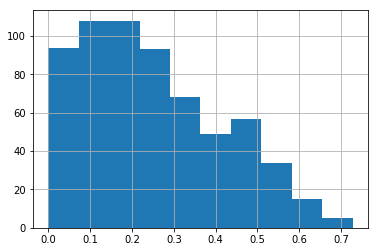

In [19]:
dfd["diversity"].hist()

In [44]:
len(df_scaled)

632

In [45]:
len(dfd)

641

In [46]:
district_name

'Ghaziabad'

In [50]:
dfd[dfd["district"]==district_name]["diversity"].values[0]

0.3819291819291819

In [51]:
dfd["diversity"].mean()

0.21315280321672944

### Setting locations for each dot and saving as geojson file

In [52]:
idx = 0
dfacc = pd.DataFrame()
identified_district_indices = []

for i in range(len(df_scaled)):
    if i%1e3==0:
        print(i)
    district_name = df_scaled.iloc[i]["district"]
    district_population_scaled = int(df_scaled.iloc[i]["scaled_population"])
    district_diversity = dfd[dfd["district"]==district_name]["diversity"].values[0]    
    #district_diversity = df_scaled.iloc[i]["diversity"]
    
    dfp = pd.DataFrame()
    flag = 0
    
    if not np.isfinite(district_diversity):
        district_diversity = dfd["diversity"].mean()
        
    for j in range(len(data["features"])):
        district_name_geojson = data["features"][j]["properties"]["NAME_2"]
        
        if district_name_geojson == district_name:
            flag = 1
            identified_district_indices.append(j)
            
            """
            ### Derive coordinates based on district boundary
            if len(data["features"][j]["geometry"]["coordinates"]) > 1:
                district_coordinates = data["features"][j]["geometry"]["coordinates"][0]
            else:
                district_coordinates = data["features"][j]["geometry"]["coordinates"]
                
            if j in [19, 110]:
                c = district_coordinates
            else:
                c = district_coordinates[0]
            lng_extent = [x[0] for x in c] # first coordinate
            lat_extent = [x[1] for x in c] # Second coordinate
            #bbox = [[min(c1),min(c2)],[min(c1),max(c2)],[max(c1),max(c2)],[max(c1),min(c2)]] #,[min(c1),min(c2)]]
            """

            lng_extent = []
            lat_extent = []
            district_coordinates = data["features"][j]["geometry"]["coordinates"]
            for l in range(len(district_coordinates)):
                if len(district_coordinates[l][0])==2:
                    c = district_coordinates[l]
                else:
                    c = district_coordinates[l][0]
                lng_extent.append([x[0] for x in c]) # first coordinate
                lat_extent.append([x[1] for x in c]) # Second coordinate
            lat_extent = [item for sublist in lat_extent for item in sublist]
            lng_extent = [item for sublist in lng_extent for item in sublist]

            ymin = min(lat_extent)
            ymax = max(lat_extent)
            xmin = min(lng_extent)
            xmax = max(lng_extent)
            district_center = [(ymin+ymax)/2, (xmin+xmax)/2]
                
            #lat = ymin + (np.random() * (ymax - ymin));
            #lng = xmin + (np.random() * (xmax - xmin));
            lat = district_center[0] + np.random.normal(size=district_population_scaled) * (ymax - ymin)/5
            lng = district_center[1] + np.random.normal(size=district_population_scaled) * (xmax - xmin)/5
            
            lat[lat > ymax] = ymax
            lat[lat < ymin] = ymin
            lng[lng > xmax] = xmax
            lng[lng < xmin] = xmin

            dfp["latitude"] = lat
            dfp["longitude"] = lng
            dfp["state"] = data["features"][j]["properties"]["NAME_1"]
            dfp["district"] = district_name
            dfp["diversity"] = district_diversity
            
            district_religion = []
            for k in range(len(religion_name_array)):
                religion_name = religion_name_array[k]
                district_religion.append([k for l in range(int(df_scaled.iloc[i][religion_name]))])
            district_religion = [item for sublist in district_religion for item in sublist]
            dfp["religion"] = district_religion
                
            idx += 1

            dfacc = dfacc.append(dfp)
            """
            plt.figure()
            plt.plot(lng, lat, 's')
            plt.ylim([ymin, ymax])
            plt.xlim([xmin, xmax])
            """
    if flag==0:
        print(str(i) + "-" + district_name)

0
75-Kamrup Metropolitan
85-Kanshiram Nagar
109-Khunti
111-Kiphire
113-Kishtwar
132-Krishnagiri
133-Kulgam
151-Longleng
160-Mahamaya Nagar
183-Mewat
193-Mumbai Suburban
212-Narayanpur
222-North & Middle Andaman
233-Palwal
248-Peren
278-Ramanagara
280-Ramban
281-Ramgarh
288-Reasi
301-Sahibzada Ajit Singh Nagar
305-Samba
331-Shupiyan
337-Singrauli
368-Tapi
369-Tarn Taran
388-Tiruppur
394-Udalguri
430-Yadgir
445-Alirajpur
457-Anjaw
462-Arwal
473-Baksa
481-Bandipora
494-Barnala
549-Chikkaballapura
551-Chirang
590-Dibang Valley
596-Diu
601-East District
623-Ganderbal


In [53]:
unidentified_district_indices = np.setdiff1d(range(len(data["features"])), identified_district_indices  )
unidentified_district_names = []
for ll in unidentified_district_indices:
    unidentified_district_names.append(data["features"][ll]["properties"]["NAME_2"])

sorted(unidentified_district_names)

['East', 'Hathras', 'Upper Dibang Valley']

In [54]:
len(dfacc)

22877

In [ ]:
csv2geojson_individual(dfacc)

0


In [41]:
def csv2geojson_individual(dfl):

    ### Write csv data to geojson file
    features = []
    for i in range(len(dfl)):
        if i%1000==0:
            print(i)
        coordinates = [dfl.iloc[i]["longitude"], dfl.iloc[i]["latitude"]]

        features.append(
            Feature(
                geometry = {
                    'type': "Point",
                    'coordinates': geojson.Point((coordinates)),  
                },
                properties = {
                    'id': int(dfl.index[i]),
                    'religion': int(dfl.iloc[i]["religion"]),
                    'district': dfl.iloc[i]["district"],
                    'state': dfl.iloc[i]["state"],
                    'diversity': dfl.iloc[i]["diversity"]
                }
            )
        )
    collection = FeatureCollection(features)
    #print(collection)
    with open("../code/data/religion_location_scale5e4.geojson", "w") as f:
        f.write('%s' % collection)